In [288]:
from importlib import reload
from matplotlib import image
import matplotlib.pyplot as plt
import enhancer

reload(enhancer)

<module 'enhancer' from 'C:\\Users\\Nalu Zou\\Documents\\Self study\\CV\\Ch3 exercises\\3.29\\enhancer.py'>

In [238]:
# Bounds of arc
p0 = [651, 493]
p1 = [707, 481]
#p2 = [553, 305]
p2 = [505, 251]
#p3 = [514, 347]
p3 = [463, 274]

14418
598173.9 625426.2


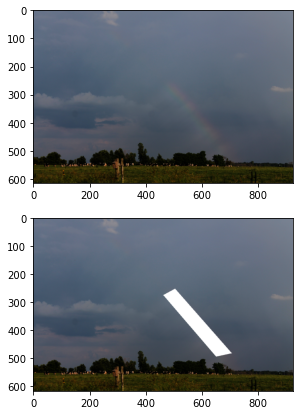

In [239]:
img = image.imread("rainbow.png")
img_linear = img ** 2.2
mask = enhancer.get_mask(img_linear.shape[0], img_linear.shape[1], p0, p1, p2, p3)

img_copy = np.copy(img_linear)
img_copy[mask, :] = [1, 1, 1]
print(np.sum(mask))

fig, axs = plt.subplots(2, figsize=(5, 7))
axs[0].imshow(img_linear)
axs[1].imshow(img_copy)
print(np.sum(img_linear), np.sum(img_copy))

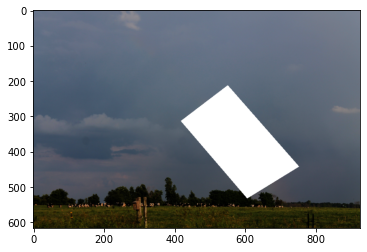

In [240]:
width = 60
rainbow_line = enhancer.get_homogenous_line(p3, p0)
p0_wide = p0 - width * rainbow_line[:2]
p1_wide = p1 + width * rainbow_line[:2]
p2_wide = p2 + width * rainbow_line[:2]
p3_wide = p3 - width * rainbow_line[:2]
wide_mask = enhancer.get_mask(img_linear.shape[0], img_linear.shape[1], p0_wide, p1_wide, p2_wide, p3_wide)

img_copy = np.copy(img_linear)
img_copy[wide_mask, :] = [1, 1, 1]
plt.imshow(img_copy)

(616, 925, 3)
(2, 50096)


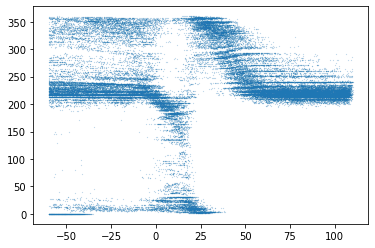

In [252]:
diff_img = enhancer.get_diff_img(img_linear)
print(diff_img.shape)
result, wheel, d_min, d_max = enhancer.get_hues(diff_img, wide_mask, rainbow_line)
print(result.shape)
plt.scatter(result[0, :], result[1, :], s=0.01)

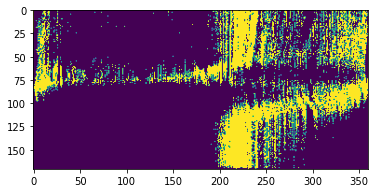

In [253]:
plt.imshow(wheel)

110


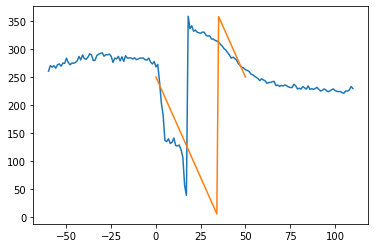

In [262]:
angles, sins, coss = enhancer.get_avg_hues(wheel)
plt.plot(np.arange(d_min, d_max + 1), angles)

max_d = enhancer.get_d_max(rainbow_line, p1)
print(d_max)
d_vals = np.arange(0, max_d + 1)
plt.plot(d_vals, enhancer.rainbow_func(d_vals, max_d))

-60
[ 2.16124251e-17 -9.14865139e-15  1.73435971e-12 -1.94581553e-10
  1.43777781e-08 -7.36596951e-07  2.68220023e-05 -7.00184829e-04
  1.30613349e-02 -1.71871017e-01  1.56250153e+00 -9.55506920e+00
  3.78547849e+01 -8.78934357e+01  6.64858786e+01  2.67228327e+02]
268.00363968970987 0


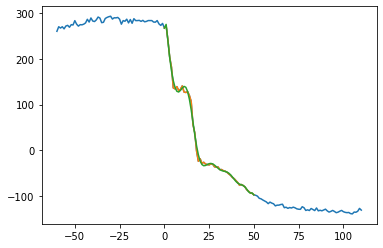

In [286]:
print(d_min)

fit_angles = angles.copy()
fit_angles[78:] -= 360
plt.plot(np.arange(d_min, d_max + 1), fit_angles)

angles_filtered = fit_angles[-d_min : max_d - d_min + 1]
plt.plot(d_vals, angles_filtered)

coeffs = np.polyfit(d_vals, angles_filtered, 15)
print(coeffs)
print(angles_filtered[0], d_vals[0])

y_fit = np.polyval(coeffs, d_vals)
plt.plot(d_vals, y_fit)

359.9526561975304 0.02146280887723151


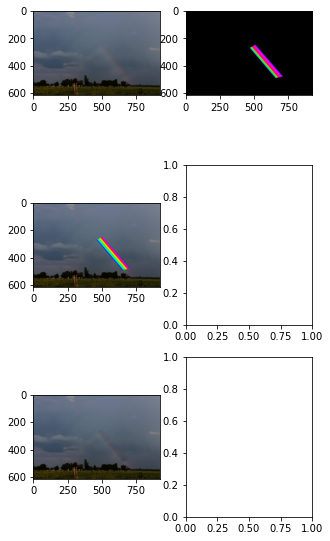

In [299]:
def rainbow_func_poly(d, dmax):
    hues = np.polyval(coeffs, d)
    hues[hues < 0] += 360
    print(hues.max(), hues.min())
    return hues

rainbow_img = enhancer.get_rainbow_img(img, mask, rainbow_line, max_d, enhancer.rainbow_linear)
rainbow_img_poly = enhancer.get_rainbow_img(img, mask, rainbow_line, max_d, rainbow_func_poly)

fig, axs = plt.subplots(3, 2, figsize=(5, 10))
sub_img = img_linear - 0.06 * rainbow_img
sub_img[sub_img < 0] = 0
overlaid = img_linear.copy()
overlaid[mask] = rainbow_img[mask]

axs[0, 0].imshow(img_linear)
axs[1, 0].imshow(overlaid)
axs[2, 0].imshow(sub_img)

axs[0, 1].imshow(rainbow_img_poly)

image.imsave("rainbow_sub.png", sub_img)
image.imsave("overlaid.png", overlaid)
image.imsave("rainbow_poly.png", rainbow_img_poly)